## Análisis de Datos con Python

<h2>Indice</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li><a href="#import_data">Importar datos de la sesión 01</a></li>
    <li><a href="#pattern_visualization">Analyzing Individual Feature Patterns using Visualization</a></li>
    <li><a href="#discriptive_statistics">Descriptive Statistical Analysis</a></li>
    <li><a href="#basic_grouping">Basics of Grouping</a></li>
    <li><a href="#correlation_causation">Correlation and Causation</a></li>
    <li><a href="#anova">ANOVA</a></li>
</ol>
</div>
 
<hr>

<h3>Cuál es la principal caracteristica que tiene el mayor impacto en el precio del auto?</h3>

<h2 id="import_data">1. Importar datos de la sesión 01</h2>

<h4>Setup</h4>

 Import libraries 

In [4]:
import pandas as pd
import numpy as np

 load data and store in dataframe df:

In [5]:
namefile ='automobileEDA.csv'
df = pd.read_csv(namefile)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [6]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


<h2 id="pattern_visualization">2. Analizando individualmente las variables usando visualización</h2>

Importar las librerias "Matplotlib" y "Seaborn"

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

<h4>Como escoger el correcto método de visualización?</h4>
<p>Identificamos los tipos de variables que tenemos.</p>


In [8]:
# lista os tipos de datos de cada variable predictora
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h3>Pregunta #1:</h3>

<b>¿Qué tipo de datos tiene la variable  "peak-rpm"? </b>
</div>

Se calcula las correlaciones entre las variables del tipo "int64" o "float64" usando el metodo "corr":

In [9]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


La diagonal siempre es 1.

In [10]:
df[['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'price']].corr() 

,wheel-base,length,width,curb-weight,engine-size,price
wheel-base,1.000000,0.876024,0.814507,0.782097,0.572027,0.584642
length,0.876024,1.000000,0.857170,0.880665,0.685025,0.690628
width,0.814507,0.857170,1.000000,0.866201,0.729436,0.751265
curb-weight,0.782097,0.880665,0.866201,1.000000,0.849072,0.834415
engine-size,0.572027,0.685025,0.729436,0.849072,1.000000,0.872335
price,0.584642,0.690628,0.751265,0.834415,0.872335,1.000000


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Pregunta  #2: </h1>

<p>Encontrar la correlación entre las variables : bore, stroke,compression-ratio  y horsepower.</p>
</div>

In [11]:
# Solucion
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr() 

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


<h2>Variables númericas continuas:</h2> 

<p>Son variables que pueden contener cualquier valor en algun rango, son de tipo "int64" o "float64". Una excelente manera de visualizar estas variables es mediante el uso de diagramas de dispersión con líneas ajustadas.</p>

<p>Para comenzar a comprender la relación (lineal) entre una variable individual y el "price". Podemos hacer esto usando "regplot", que traza el diagrama de dispersión más la línea de regresión ajustada para los datos.</p>

<h4>Relaciones positivas lineales</h4>

Busquemos el diagrama de dispersión de "engine-size" y "price"

(0, 56199.13130699235)

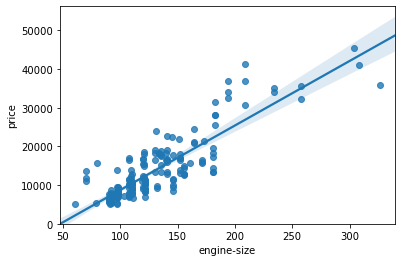

In [12]:
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

<p>A medida que aumenta el tamaño del motor, aumenta el precio: esto indica una correlación directa positiva entre estas dos variables. El tamaño del motor parece un buen predictor de precio ya que la línea de regresión es casi una línea diagonal perfecta.</p>

Podemos examinar la correlación entre 'engine-size' y 'price' y ver que es aproximadamente 0.87

In [13]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000



Busquemos el diagrama de dispersión de "highway-mpg" y "price"

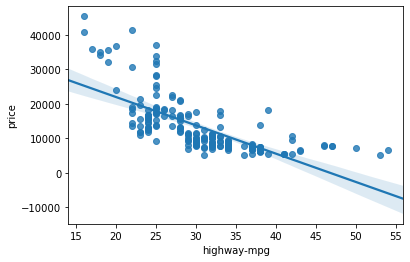

In [14]:
sns.regplot(x="highway-mpg", y="price", data=df)

<p>A medida que sube el highway-mpg, el price baja: esto indica una relación inversa / negativa entre estas dos variables. El highway-mpg podría ser un potencial predictor para el price.</p>

La correlación entre 'highway-mpg' y 'price' es aproximadamente  -0.704

In [15]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


<h3>Relaciones lineales débiles</h3>

Se analiza "Peak-rpm" como una variable predictora de "price".

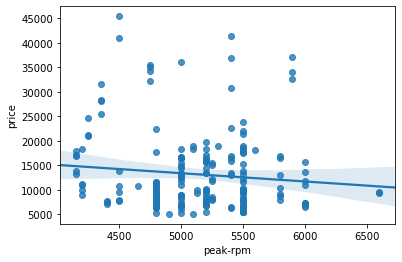

In [16]:
sns.regplot(x="peak-rpm", y="price", data=df)

<p>Las peak-rpm no parecen ser un buen predictor al price, ya que la línea de regresión está cerca de la horizontal. Además, los puntos de datos están muy dispersos y lejos de la línea ajustada, lo que muestra mucha variabilidad. Por lo tanto, no es una variable confiable.</p>

La correlación entre 'peak-rpm' y 'price' es aproximadamente -0.101616 

In [17]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Pregunta  3 a): </h1>

<p>Encontrar la correlación entre x="stroke", y="price".</p>
</div>

In [18]:
# Respuesta
df[["stroke","price"]].corr() 


,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


Double-click <b>here</b> for the solution.

<!-- The answer is below:

#The correlation is 0.0823, the non-diagonal elements of the table.
#code:
df[["stroke","price"]].corr() 

-->

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question  3 b):</h1>

<p>Analizar el resultado de la correlacion entre el  "price" y "stroke", tiene una relación lineal?</p> 
<p>Verifica los resultados con la función  "regplot()".</p>
</div>

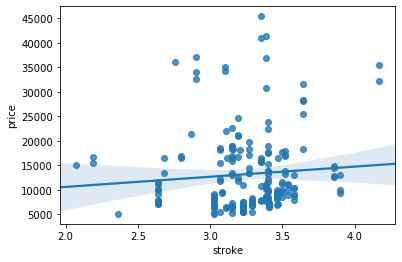

In [19]:
# Resultado: 
sns.regplot(x="stroke", y="price", data=df)

Double-click <b>here</b> for the solution.

<!-- The answer is below:

#There is a weak correlation between the variable 'stroke' and 'price.' as such regression will not work well.  We #can see this use "regplot" to demonstrate this.

#Code: 
sns.regplot(x="stroke", y="price", data=df)

-->

<h3>Variables categoricas</h3>

<p>Estas son variables que describen una 'característica' de una unidad de datos y se seleccionan de un pequeño grupo de categorías. Las variables categóricas pueden tener el tipo "objeto" o "int64". Una buena forma de visualizar variables categóricas es mediante el uso de diagramas de caja.</p>

Se revisa la relación entre "body-style" y "price".

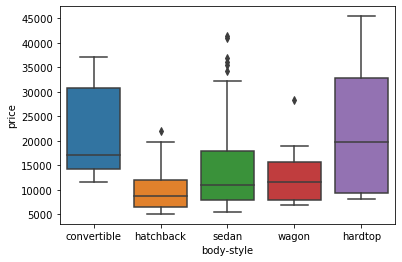

In [20]:
sns.boxplot(x="body-style", y="price", data=df)

<p> Vemos que las distribuciones de precios entre las diferentes categorías de estilo de cuerpo (body-style) tienen una superposición significativa, por lo que el estilo de cuerpo no sería un buen predictor del precio. Examinemos la "engine-location" y "price": </p>

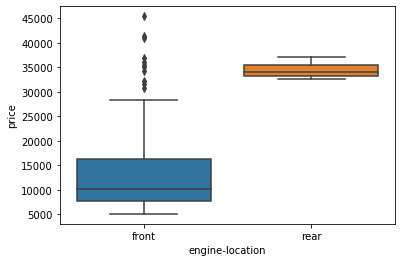

In [21]:
sns.boxplot(x="engine-location", y="price", data=df)

<p>Aquí vemos que la distribución del precio entre estas dos categorías de ubicación del motor (engine-location), front y rear, es lo suficientemente distinta como para tomar la ubicación del motor como un buen predictor potencial del precio.</p>

 Examinando la relación entre  "drive-wheels" y "price".

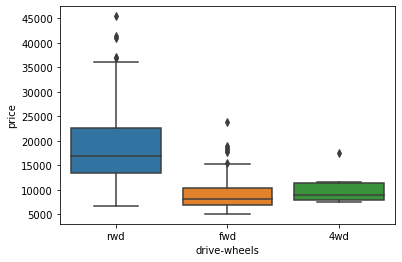

In [22]:
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df)

<p>Aquí vemos que la distribución de precios (price) entre las diferentes categorías de ruedas motrices(drive-wheels)  es diferente; Como tal, las ruedas motrices (drive-wheels) podrían ser un predictor de precio.</p>

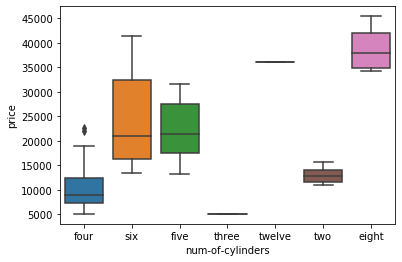

In [23]:
# num-of-cylinders
sns.boxplot(x="num-of-cylinders", y="price", data=df)

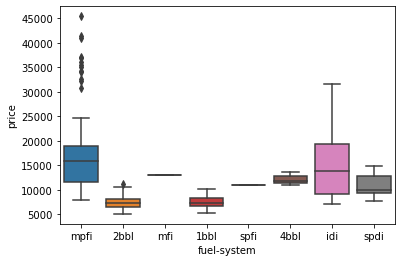

In [24]:
# fuel-system
sns.boxplot(x="fuel-system", y="price", data=df)

<h2 id="discriptive_statistics">3. Análisis estadístico descriptivo</h2>

<p>La funcion <b>describe</b> calcula automáticamente estadísticas básicas para todas las variables continuas. Cualquier valor de NaN se omite automáticamente en estas estadísticas.</p>

This will show:
<ul>
    <li>Contador de variables</li>
    <li>La media</li>
    <li>La desviación estandar(std)</li> 
    <li>El valor minimo</li>
    <li>El IQR (Rango intercuartil: 25%, 50% and 75%)</li>
    <li>El valor máximoe</li>
<ul>


In [25]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


 The default setting of "describe" skips variables of type object. We can apply the method "describe" on the variables of type 'object' as follows:

In [26]:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


<h3>Contar valores</h3>

<p>El conteo de valores es una buena forma de entender cuántas unidades de cada característica / variable tenemos. Podemos aplicar el método "value_counts" en la columna 'drive-wheels'. No olvide que el método "value_counts" solo funciona en series Pandas, no en Pandas Dataframes. Como resultado, solo incluimos un soporte "df['drive-wheels']" no dos soportes "df[['drive-wheels']]".</p>

In [27]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

Convertir la seria a un dataframe de la siguiente manera:

In [28]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


Se repite los pasos anteriores, pero se guarda los resultados en datframe "drive_wheels_counts" y se cambie el nombre de la columna 'drive-wheels' a 'value_counts'.

In [29]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


 Se renombra el index a : 'drive-wheels':

In [30]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


Se repite lo mismo para la variable : 'engine-location'.

In [31]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,198
rear,3


<p>
Examinando el valor del conteo de la ubicación del motor (engine-location) no sería una buena variable predictiva del precio. Esto se debe a que solo tenemos tres autos con motor trasero (rear) y 198 con motor delantero (front), este resultado es muy sesgado. Por lo tanto, no podemos sacar ninguna conclusión sobre la ubicación del motor.
</p>

<h2 id="basic_grouping">4. 
Conceptos básicos de agrupación</h2>

<p>El método  "groupby" agrupa datos por categorias.Los datos se agrupan en función de una o varias variables y el análisis se realiza en los grupos individuales..</p>

<p>Se agrupa la variable "drive-wheels". Se observan 3 tipos de categorias.</p>

In [32]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

<p>Si queremos saber, en promedio, qué tipo de rueda motriz es más valiosa, podemos agrupar las "drive-wheels" y luego promediarlas..</p>

<p>Podemos seleccionar las columnas 'drive-wheels', 'body-style' y 'price', luego asignarlo a la variable "df_group_one".</p>

In [33]:
df_group_one = df[['drive-wheels','body-style','price']]

Luego podemos calcular el precio promedio para cada una de las diferentes categorías de datos

In [34]:
df_group_one.head()

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0


In [35]:
# grouping results
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


<p>
Según nuestros datos, parece que los vehículos con tracción trasera  (rear-wheel) son, en promedio, los más caros, mientras que las 4 ruedas (4-wheel) y las ruedas delanteras (front-wheel) tienen aproximadamente el mismo precio.
</p>

<p>
También puede agrupar con múltiples variables. Por ejemplo, agrupemos por ''drive-wheels' y 'body-style'. Esto agrupa el marco de datos por las combinaciones únicas 'drive-wheels' y 'body-style'. Podemos almacenar los resultados en la variable 'grouped_test1'.</p>

In [36]:
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


<p>Estos datos agrupados son mucho más fáciles de visualizar cuando se convierten en una pivot table. Una pivot table es como una hoja de cálculo de Excel, con una variable a lo largo de la columna y otra a lo largo de la fila. Podemos convertir un dataframe en una tabla dinámica utilizando el método "pivot" para crear una pivot table desde grupos
</p>

<p>En este caso, dejaremos la variable de la rueda motriz (drive-wheel) como las filas de la tabla y giraremos el estilo del cuerpo (body-style ) para convertirlas en las columnas de la tabla:</p>

In [37]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

<p>
A menudo, no tendremos datos para algunas de las celdas dinámicas. Podemos llenar estas celdas faltantes con el valor 0, pero cualquier otro valor también podría usarse. Cabe mencionar que la falta de datos es un tema bastante complejo y es un curso completo por sí solo.
</p>

In [38]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Pregunta 4:</h1>

<p>Usar la funcion  "groupby" para encontrar el promedio del  "price" de cada auto basado en "body-style" ? </p>
</div>

In [39]:
# Respuesta
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


In [40]:
import matplotlib.pyplot as plt
%matplotlib inline 

<h4>Variables: Drive Wheels y Body Style vs Price</h4>

<p>
El heatmap (mapa de calor) traza la variable objetivo (precio) proporcional al color con respecto a las variables 'drive-wheel' y 'body-style' en los ejes vertical y horizontal, respectivamente. Esto nos permite visualizar cómo se relaciona el precio con 'drive-wheel' y 'body-style'</p>


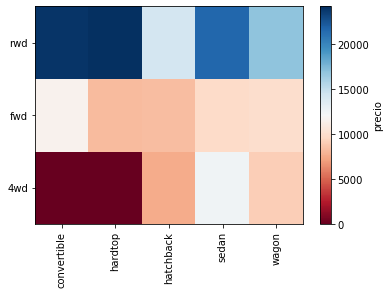

In [41]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im, label="precio")
plt.show()

<p>La visualización es muy importante en la ciencia de datos, y los paquetes de visualización de Python proporcionan una gran libertad. </p>

<p>La pregunta principal que queremos responder en este módulo es "¿Cuáles son las principales características que tienen el mayor impacto en el precio del automóvil?". </p>

<p> Para obtener una mejor medición de las características importantes, observamos la correlación de estas variables con el precio del automóvil, en otras palabras: ¿cómo depende el precio del automóvil de esta variable? </p>

In [42]:
# grouping results
df_gptest2 = df[['fuel-system','num-of-cylinders','price']]
grouped_test2 = df_gptest2.groupby(['fuel-system','num-of-cylinders'],as_index=False).mean()
grouped_test2

,fuel-system,num-of-cylinders,price
0,1bbl,four,7555.545455
1,2bbl,four,7469.428571
2,2bbl,three,5151.000000
3,4bbl,two,12145.000000
4,idi,five,28394.000000
5,idi,four,12047.800000
6,idi,six,22470.000000
7,mfi,four,12964.000000
8,mpfi,eight,38900.000000
9,mpfi,five,17750.000000


In [43]:
grouped_pivot2 = grouped_test2.pivot(index='fuel-system',columns='num-of-cylinders')
grouped_pivot2

price                                               \
num-of-cylinders    eight     five          four           six   three   
fuel-system                                                              
1bbl                  NaN      NaN   7555.545455           NaN     NaN   
2bbl                  NaN      NaN   7469.428571           NaN  5151.0   
4bbl                  NaN      NaN           NaN           NaN     NaN   
idi                   NaN  28394.0  12047.800000  22470.000000     NaN   
mfi                   NaN      NaN  12964.000000           NaN     NaN   
mpfi              38900.0  17750.0  13338.140351  23724.086957     NaN   
spdi                  NaN      NaN  10990.444444           NaN     NaN   
spfi                  NaN      NaN  11048.000000           NaN     NaN   

                                    
num-of-cylinders   twelve      two  
fuel-system                         
1bbl                  NaN      NaN  
2bbl                  NaN      NaN  
4bbl                  NaN  12145.0  
idi                   NaN      NaN  
mfi                   NaN      NaN  
mpfi              36000.0  15645.0  
spdi                  NaN      NaN  
spfi                  NaN      NaN

In [44]:
grouped_pivot2 = grouped_pivot2.fillna(0) #fill missing values with 0
grouped_pivot2

price                                               \
num-of-cylinders    eight     five          four           six   three   
fuel-system                                                              
1bbl                  0.0      0.0   7555.545455      0.000000     0.0   
2bbl                  0.0      0.0   7469.428571      0.000000  5151.0   
4bbl                  0.0      0.0      0.000000      0.000000     0.0   
idi                   0.0  28394.0  12047.800000  22470.000000     0.0   
mfi                   0.0      0.0  12964.000000      0.000000     0.0   
mpfi              38900.0  17750.0  13338.140351  23724.086957     0.0   
spdi                  0.0      0.0  10990.444444      0.000000     0.0   
spfi                  0.0      0.0  11048.000000      0.000000     0.0   

                                    
num-of-cylinders   twelve      two  
fuel-system                         
1bbl                  0.0      0.0  
2bbl                  0.0      0.0  
4bbl                  0.0  12145.0  
idi                   0.0      0.0  
mfi                   0.0      0.0  
mpfi              36000.0  15645.0  
spdi                  0.0      0.0  
spfi                  0.0      0.0

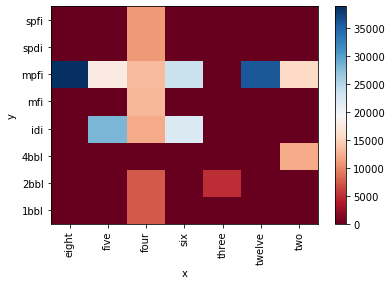

In [45]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot2, cmap='RdBu')

#label names
row_labels = grouped_pivot2.columns.levels[1]
col_labels = grouped_pivot2.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot2.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot2.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

ax.set_ylabel("y")
ax.set_xlabel("x")

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<h2 id="correlation_causation">5. Correlation and Causation</h2>

<p> <b> Correlación </b>: una medida del grado de interdependencia entre variables. </p>

<p> <b> Causación </b>: la relación entre causa y efecto entre dos variables. </p>

<p> Es importante saber que la correlación no implica causalidad. Determinar la correlación es mucho más simple que la causalidad determinante ya que la causalidad puede requerir experimentación independiente. </p>


<p3> <b>Correlación de Pearson</b> </p3>
<p> La Correlación de Pearson mide la dependencia lineal entre dos variables X e Y. </p>
<p> El coeficiente resultante es un valor entre -1 y 1, donde: </p>
<ul>
    <li> <b> 1 </b>: correlación lineal positiva. </li>
    <li> <b> 0 </b>: Sin correlación lineal, las dos variables probablemente no se afectan entre sí. </li>
    <li> <b> -1 </b>: correlación lineal negativa. </li>
</ul>


<p> Correlación de Pearson es el método predeterminado de la función <b>"corr"</b>.Se puede  calcular la correlación de Pearson de las variables 'int64' o 'float64'. </p>

In [46]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


<b>p-valor</b>: 
<p> ¿Qué es este p-valor? El p-valor es el valor de probabilidad de que la correlación entre estas dos variables sea estadísticamente significativa. Normalmente, elegimos un nivel de significancia de 0.05, lo que significa que estamos 95% seguros de que la correlación entre las variables es significativa. </p>

Por convención, cuando el
<ul>
    <li> el p-valor es $ <$ 0.001: decimos que hay pruebas sólidas de que la correlación es significativa. </li>
    <li> el p-valor es $ <$ 0.05: existe evidencia moderada de que la correlación es significativa. </li>
    <li> el p-valor es $ <$ 0.1: existe evidencia débil de que la correlación es significativa. </li>
    <li> el p-valor es $> $ 0.1: no hay evidencia de que la correlación sea significativa. </li>
</ul>

<b>Scipy</b>: 

La libreria SciPy proporciona muchas rutinas numéricas fáciles de usar y eficientes, como rutinas para integración numérica, interpolación, optimización, álgebra lineal y estadísticas.

https://www.scipy.org/scipylib/index.html

Para calcular el coeficientes de Pearson y el p-valor se procedera a utilizar el módulo de "estadísticas" de la libreria "scipy"

In [47]:
from scipy import stats

<h3>Wheel-base vs Price</h3>

Calculamos el coeficiente de correlación de Pearson y p-valor entre 'wheel-base' y 'price'. 

In [56]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("El coeficiente de correlación de Pearson es", round(pearson_coef,3),
      " con un p-valor de ", p_value)  

El coeficiente de correlación de Pearson es 0.585  con un p-valor de  8.076488270733218e-20


<h5> Conclusión: </h5>
<p> Dado que el p-valor es $ <$ 0.001, la correlación entre la distancia entre ejes (wheel-base) y el precio es estadísticamente significativa, aunque la relación lineal no es extremadamente fuerte (~ 0.585) </p>

In [ ]:
<h3>Horsepower vs Price</h3>

In [ ]:
Calculamos el coeficiente de correlación de Pearson y p-valor entre 'horsepower' y 'price'. 

In [59]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("El coeficiente de correlación de Pearson es", round(pearson_coef,3),
      " con un p-valor de ", p_value)  

El coeficiente de correlación de Pearson es 0.81  con un p-valor de  6.369057428259557e-48


<h5> Conclusión: </h5>
<p> Dado que el p-valor es $ <$ 0.001, la correlación entre los caballos de fuerza (horsepower) y el precio es estadísticamente significativa y la relación lineal es ligeramente fuerte (~ 0.81) </p>

<h3>Length vs Price</h3>

Calculamos el coeficiente de correlación de Pearson y p-valor entre 'length' y 'price'. 

In [62]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("El coeficiente de correlación de Pearson es", round(pearson_coef,3),
      " con un p-valor de ", p_value)  

El coeficiente de correlación de Pearson es 0.691  con un p-valor de  8.016477466158986e-30


<h5> Conclusión: </h5>
<p> Dado que el p-valor es $ <$ 0.001, la correlación entre la longitud de auto (length) y el precio es estadísticamente significativa y la relación lineal es moderamente fuerte (~ 0.691) </p>

<h3>Width vs Price</h3>

Calculamos el coeficiente de correlación de Pearson y p-valor entre 'width' y 'price'. 

In [65]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("El coeficiente de correlación de Pearson es", round(pearson_coef,3),
      " con un p-valor de ", p_value)  

El coeficiente de correlación de Pearson es 0.751  con un p-valor de  9.200335510481516e-38


<h5> Conclusión: </h5>
<p> Dado que el p-valor es $ <$ 0.001, la correlación entre el ancho del auto y el precio es estadísticamente significativa y la relación lineal es ligeramente fuerte (~ 0.751) </p>

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Pregunta 5:</h1>

<p>Calcular la correlación de Pearson y el p-valor entre:
    <ul>
    <li> Engine-size vs Price
    <li> City-mpg vs Price
    <li> Highway-mpg vs Price   
    <li> Bore vs Price
    </ul>
</p>

</div>

<h2 id="anova">6. ANOVA</h2>

<h3> ANOVA: Análisis de varianza </h3>
<p> El análisis de varianza (ANOVA) es un método estadístico utilizado para evaluar si existen diferencias significativas entre las medias de dos o más grupos. ANOVA devuelve dos parámetros: </p>

<p> <b> F-test score </b>: ANOVA asume que las medias de todos los grupos son iguales, calcula cuánto se desvían los medios reales de la suposición, y lo informa como el puntaje de F-test. Una puntuación mayor significa que hay una diferencia mayor entre las medias. </p>

<p> <b> P-valor </b>: el p-valor indica cuán estadísticamente significativo es nuestro valor de puntaje calculado. </p>

<p> Si nuestra variable de precio está fuertemente correlacionada con la variable que estamos analizando, espere que ANOVA devuelva una puntuación considerable en la prueba F y un valor p pequeño. </p>

<h3>Drive Wheels</h3>

<p> Dado que ANOVA analiza la diferencia entre  grupos de la misma variable, la función groupby será útil. Debido a que el algoritmo ANOVA promedia los datos automáticamente, no necesitamos tomar el promedio de antemano. </p>

<p> Veamos si diferentes tipos de 'drive-wheels' impactan en el 'price'. </p>

In [96]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [97]:
df[df["drive-wheels"] == "rwd"]["price"]

0      13495.0
1      16500.0
2      16500.0
9      16430.0
10     16925.0
        ...   
196    16845.0
197    19045.0
198    21485.0
199    22470.0
200    22625.0
Name: price, Length: 75, dtype: float64

In [98]:
df[df["drive-wheels"] == "fwd"]["price"]

3      13950.0
5      15250.0
6      17710.0
7      18920.0
8      23875.0
        ...   
185    11595.0
186     9980.0
187    13295.0
188    13845.0
189    12290.0
Name: price, Length: 118, dtype: float64

In [99]:
df[df["drive-wheels"] == "4wd"]["price"]

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [100]:
# ANOVA
f_val, p_val = stats.f_oneway(df[df["drive-wheels"] == "fwd"]["price"], 
                              df[df["drive-wheels"] == "rwd"]["price"], 
                              df[df["drive-wheels"] == "4wd"]["price"])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


Con una puntuación de F-test grande que muestra una fuerte correlación y un p-valor cercano a 0, lo que implica una significación estadística casi segura. Pero, ¿significa esto que los tres grupos probados están tan correlacionados?

#### Separado: fwd and rwd

In [103]:
f_val, p_val = stats.f_oneway(df[df["drive-wheels"] == "fwd"]["price"], 
                              df[df["drive-wheels"] == "rwd"]["price"])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


#### Separado: 4wd and rwd

In [104]:
f_val, p_val = stats.f_oneway(df[df["drive-wheels"] == "4wd"]["price"], 
                              df[df["drive-wheels"] == "rwd"]["price"])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


#### Separado: 4wd and fwd

In [105]:
f_val, p_val = stats.f_oneway(df[df["drive-wheels"] == "4wd"]["price"], 
                              df[df["drive-wheels"] == "fwd"]["price"])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


<h3>Conclusion: Importantes Variables</h3>

<p> Ahora tenemos una mejor idea de cómo se ven nuestros datos y qué variables son importantes para tener en cuenta al predecir el precio del automóvil. Lo hemos reducido a las siguientes variables: </p>

Variables numéricas continuas:
<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>
    
Variables categóricas:
<ul>
    <li>drive-wheels</li>
</ul>